In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Steps:

1.	Generate set of random coordinates in 3-dimensional space.
2.	Plot those points.
3.	Write function which calculates Euclidean distance between those points and location with unknown value.
4.	Test function for distance calculation.
5.	Rewrite IDW function from previous tutorial (LINK).
6.	Test IDW function with prepared data.
7.	Test IDW with generated point clouds, interpolate unknown values and plot everything.

In [2]:
# Step 1. Generate random points in 3D space.
# Use numpy.random.randint() method and create 3-element array of values between 0 and 1000 and a length of 100.

In [3]:
np.random.seed(1)
random_points = np.random.randint(low=0, high=1000, size=(100, 3))
print(random_points[0])

[ 37 235 908]


In [4]:
# Step 2. Plot generated points.
# Use matplotlib's scatter3D function

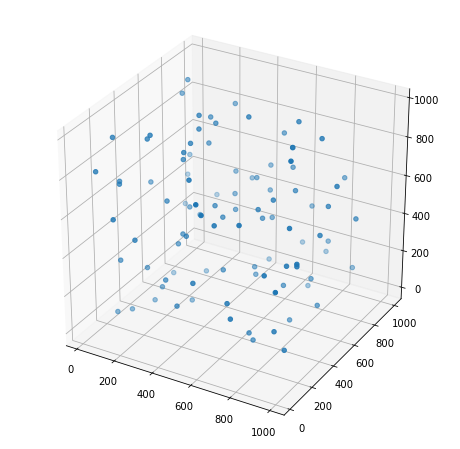

In [5]:
figure = plt.figure(figsize=(8, 8), facecolor='w')
ax = figure.add_subplot(111, projection='3d')
ax.scatter3D(random_points[:, 0], random_points[:, 1], random_points[:, 2])
plt.show()

In [6]:
# Step 3. Calculate distances between 3D coordinates list and specified point. Use numpy array operations.

def calculate_distances(coordinates, unknown_point):
    
    
    # Get coordinates dimension
    coordinates_dim = coordinates.shape[1]  # Number of columns in numpy array / Number of dimensions
    
    distances_between_dims = []
    
    for i in range(coordinates_dim):
        distance = (coordinates[:, i] - unknown_point[i])**2
        distances_between_dims.append(distance)
    
    dists_array = np.sqrt(np.sum(distances_between_dims, axis=0))
    
    return dists_array

In [7]:
# Step 4. Test your algorithm with prepared array and unknown point

test_arr = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

test_unknown_point = [2, 2, 2]
output_distances = np.array([3, 3, 3])

distances = calculate_distances(coordinates=test_arr, unknown_point=test_unknown_point)

assert (distances == output_distances).all()

In [8]:
# Step 5. The hardest part: create IDW function for n-dimensional coordinates space. You may use function from the
# previous tutorial and refactor it slightly!

def inverse_distance_weighting(unknown_point, points, power, ndist=10):
    """
    Function estimates values in unknown points with with inverse weighted interpolation technique.
    
    INPUT:
    :param unknown_point: coordinates of unknown point,
    :param points: (array) list of points and they values [dim 1, ..., dim n, val],
    :param power: (float) constant used to calculate IDW weight -> weight = 1/(distance**power),
    :param ndist: (int) how many closest distances are included in weighting,
    
    OUTPUT:
    :return interpolated_value: (float) interpolated value by IDW method.
    
    Inverse distance weighted interpolation is:
    
    est = SUM(WEIGHTS * KNOWN VALS) / SUM(WEIGHTS)
    and
    WEIGHTS = 1 / (DISTANCE TO UNKNOWN**power)
    
    where:
    power is a constant hyperparameter which tells how much point is influenced by other points. 
    """

    distances = calculate_distances(points[:, :-1], unknown_point)
    vals_and_dists = np.c_[points[:, -1], distances]
    
    # Sort and get only 10 values
    vals_and_dists = vals_and_dists[vals_and_dists[:, 1].argsort()]
    vals_for_idw = vals_and_dists[:ndist, :]
    
    # Check if first distance is 0
    if vals_for_idw[0, 1] == 0:
        # If first distance is 0 then return first value
        return vals_for_idw[0, 0]
    else:
        # If it's not perform calculations
        weights = 1 / (vals_for_idw[:, 1]**power)
        numerator = weights * vals_for_idw[:, 0]
        interpolated_value = np.sum(numerator) / np.sum(weights)
        return interpolated_value

In [9]:
# Step 6. Test 3D IDW with prepared data!

test_arr = np.array([
    [1, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1]
])

test_unknown_point = [2, 2, 2]

output_est = 1

estimated_value = inverse_distance_weighting(test_unknown_point, test_arr, 2)

assert output_est == estimated_value

In [10]:
# Step 7. Test 3D IDW with random generated data and unknown points evenly spaced with step size 10 from 1 to 100 
# in each dimension.
# For unknown points: use provided generate_coordinates function
# it uses numpy.arange() function to generate array with coordinates 1 to 100 and
# then it uses numpy.meshgrid() to create all possible realizations of points in this space.
# For known points: use numpy.random.randint() function and create array with 20 known points. 
# Remember, that you have to generate additional column with values, so your array will be 4-dimensional.

def generate_coordinates(lower, upper, step_size, dimension):
    coordinates = [np.arange(lower, upper, step_size) for i in range(0, dimension)]
    mesh = np.hstack(np.meshgrid(*coordinates)).swapaxes(0, 1).reshape(dimension, -1).T
    return mesh

In [11]:
coords = generate_coordinates(0, 101, 10, 3)

In [12]:
known_points = np.random.randint(0, 101, size=(20, 4))

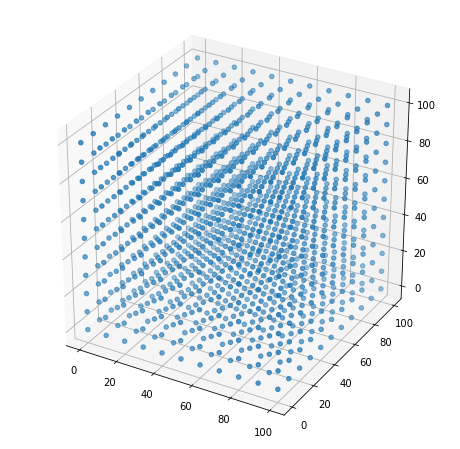

In [13]:
# Show known coordinates

figure = plt.figure(figsize=(8, 8), facecolor='w')
ax = figure.add_subplot(111, projection='3d')
ax.scatter3D(coords[:, 0], coords[:, 1], coords[:, 2])
plt.show()

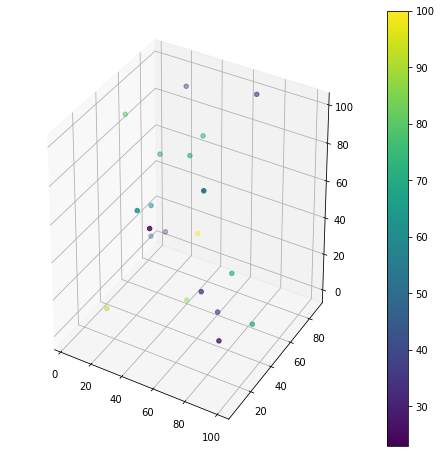

In [14]:
# Show known points

figure = plt.figure(figsize=(8, 8), facecolor='w')
ax = figure.add_subplot(111, projection='3d')
p = ax.scatter3D(known_points[:, 0], known_points[:, 1], known_points[:, 2],
             c=known_points[:, -1], cmap='viridis')
figure.colorbar(p)
plt.show()

In [15]:
# Know use IDW to calculate values for each of unknown points

def interpolate_values(array_of_coordinates, array_of_known_points):
    output_arr = []
    
    for row in array_of_coordinates:
        interpolated = inverse_distance_weighting(row, array_of_known_points, power=3, ndist=5)
        interpol_arr = np.zeros(shape=(1, len(row) + 1))
        interpol_arr[:, :-1] = row
        interpol_arr[:, -1] = interpolated
        output_arr.append(interpol_arr[0])
        
    return np.array(output_arr)

In [16]:
interp = interpolate_values(coords, known_points)

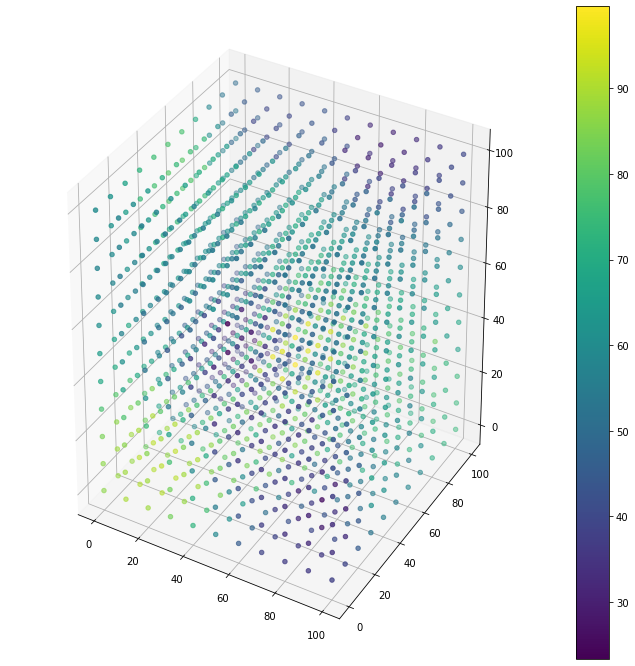

In [17]:
# Show interpolation results

figure = plt.figure(figsize=(12, 12), facecolor='w')
ax = figure.add_subplot(111, projection='3d')
p = ax.scatter3D(interp[:, 0], interp[:, 1], interp[:, 2],
             c=interp[:, -1], cmap='viridis')
figure.colorbar(p)
plt.show()